# Introduction

This project analyzes data collected from a homepage A/B test. The client is an online education site. The AB test is focused on the question of whether or not the experiment homepage moves potential students through the user funnel towards viewing course lists. 
Metrics:

* CTR and its statistical significance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# Load the data

In [2]:
df = pd.read_csv('../data/homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


# Exploratory Analysis

In [3]:
df.shape

(8188, 4)

In [4]:
#Total number of actions
#Number of unique users
df.nunique()

timestamp    8188
id           6328
group           2
action          2
dtype: int64

In [5]:
df.group.value_counts()

control       4264
experiment    3924
Name: group, dtype: int64

In [6]:
#See entry types and options for each column 
for  feature  in  ["group", "action"]:
    print("{}: {}".format(feature, df[feature].unique()))

group: ['experiment' 'control']
action: ['view' 'click']


In [7]:
#number of unique users in each group
df.groupby('group').nunique()

,timestamp,id,group,action
group,,,,
control,4264,3332,1,2
experiment,3924,2996,1,2


In [8]:
#length of experiment
df.timestamp.min(), df.timestamp.max()

('2016-09-24 17:42:27.839496', '2017-01-18 10:24:08.629327')

In [9]:
df.action.value_counts()

view     6328
click    1860
Name: action, dtype: int64

# Click through rate

CTR definition in this experiment:
The number of unique visitors who click at least once divided by the number of unique visitors who visit the page. 

In [10]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()

# Display click through rate
print("Control CTR = ", control_ctr)

Control CTR =  0.2797118847539016


In [11]:
# Get dataframe with all records from control group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# Display click through rate
print("Experiment CTR = ", experiment_ctr)

Experiment CTR =  0.3097463284379172


In [12]:
# Compute observed difference in CTR
obs_diff = experiment_ctr - control_ctr

# Display observed difference in completion rates
obs_diff

0.030034443684015644

# Sampling distribution to view proportions

In [13]:
# Create/simulate a sampling distribution of the difference in proportions (difference in click through rates)
# with bootstrapping
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

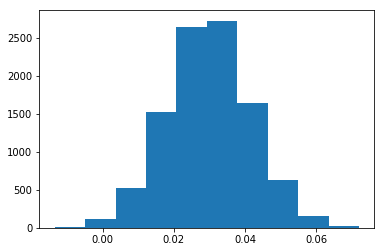

In [14]:
# plot distribution
plt.hist(diffs);

In [15]:
# convert to numpy array
diffs = np.array(diffs)

In [21]:
# create/simulate the distribution under the null hypothesis, 
#by creating a random normal distribution centered at 0
#with the same spread and size as the sampling distribution above
null_vals = np.random.normal(0, diffs.std(), diffs.size)

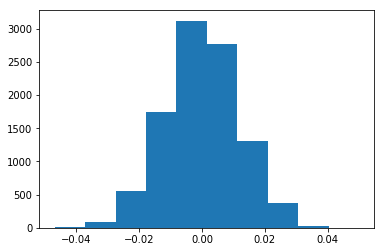

In [17]:
# plot null distribution
plt.hist(null_vals);

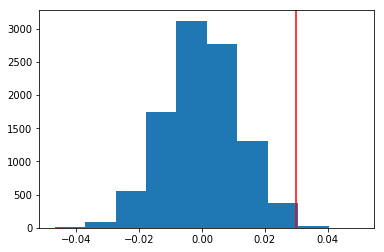

In [18]:
# plot line for observed statistic
plt.hist(null_vals);
plt.axvline(x=obs_diff, c='red');

In [22]:
#compute the p-value by finding the proportion of values in the null distribution 
#that are greater than the observed difference
(null_vals > obs_diff).mean()

0.0051999999999999998

In [23]:
#Determine the statistical significance of the observed difference,
#(statistically insignificant when below .01)
#Results are statistically significant if the p-value is less than the alpha level.

# Conclusion

We reject the null hypothesis and recommend that the new homepage be used in place of the old/control version. 